In [261]:
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup as BS
import numpy as np
import json
from statistics import mode
from scipy import stats
import requests
import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)
import matplotlib.style as style


In [3]:
connection = sqlite3.connect("database.sqlite")

cur = connection.cursor()

In [4]:
# cur.execute("""SELECT *
#                 FROM Matches
#                 WHERE Date BETWEEN '2010-12-31' and '2011-12-31'
#                 JOIN Unique_Teams
#                 ON Matches.HomeTeam = Unique_Teams.TeamName;""")
# df = pd.DataFrame(cur.fetchall())
# df.columns = [x[0] for x in cur.description]
# hometeams = df['HomeTeam'].unique()
# df

In [5]:
# cur.execute("""SELECT *
#                 FROM Matches
#                 WHERE Date BETWEEN '2010-12-31' and '2011-12-31'
#                 ;""")
# df = pd.DataFrame(cur.fetchall())
# df.columns = [x[0] for x in cur.description]
# hometeams = df['HomeTeam'].unique()
# df

In [6]:
# cur.execute("""SELECT *
#                 FROM Matches
#                 ;""")
# df = pd.DataFrame(cur.fetchall())
# df.columns = [x[0] for x in cur.description]
# s11 = df[df['Season']==2011]
# germs = s11[s11['Div']!='E0']
# for date in germs['Date']:
#     time = date
#     url = ''
#     weather = requests.get(url)
    

        

In [7]:
query = """
        SELECT *
        FROM Matches
        """
# JOIN Teams_in_Matches ON Matches.Match_ID = Teams_in_Matches
df = pd.DataFrame(cur.execute(query).fetchall())
df.columns = [x[0] for x in cur.description]
s11 = df[df['Season']==2011]
s11germ = s11[s11['Div']!='E0']
lat = 52.5065133
long = 13.1445703
weather = []
# for date in s11germ['Date']:
# #     print(date)
#     time = date
#     url='https://api.darksky.net/forecast/{}/{},{},{}T16:00:00'.format(apikey,lat,long,time)
# #     print(url)
#     response = requests.get(url)
#     weather.append(response.text)
# weather

In [62]:
# WINNER
cur.execute("""SELECT *
                FROM Teams_in_Matches
                JOIN Unique_Teams
                USING (Unique_Team_ID)
                JOIN Matches
                USING (Match_ID)
                WHERE Season == '2011' AND Div != 'E0'
                ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Match_ID,Unique_Team_ID,TeamName,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,1,Bayern Munich,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1092,22,Nurnberg,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
2,1093,1,Bayern Munich,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
3,1093,17,Stuttgart,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
4,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
...,...,...,...,...,...,...,...,...,...,...,...
1219,1701,25,Fortuna Dusseldorf,D2,2011,2011-08-15,Ein Frankfurt,Fortuna Dusseldorf,1,1,D
1220,1702,25,Fortuna Dusseldorf,D2,2011,2011-08-27,Aachen,Fortuna Dusseldorf,0,0,D
1221,1702,34,Aachen,D2,2011,2011-08-27,Aachen,Fortuna Dusseldorf,0,0,D
1222,1703,25,Fortuna Dusseldorf,D2,2011,2011-09-16,Erzgebirge Aue,Fortuna Dusseldorf,2,4,A


In [75]:
date = df['Date'].unique()
date = pd.Series(date)
teams = df['TeamName'].unique()
teams = list(teams)
lat = 52.5065133
long = 13.1445703
weather = []
for i in date:
    time = i
    keys = get_keys('/Users/nielsclausen/.secret/DARKSKYAPI.json')
    api_key = keys['api_key']
    url = 'https://api.darksky.net/forecast/{}/{},{},{}T16:00:00'.format(api_key,lat,long,time)
    response = requests.get(url)
    weather.append(response.json()['daily']['data'][0].get('icon', 'clear'))
    
    
weather = pd.Series(weather)
date_weather = pd.concat([date, weather], axis = 1)

In [76]:
date_weather.columns = ['Date', 'Weather']
print(date_weather['Weather'].unique())

['rain' 'partly-cloudy-day' 'wind' 'clear' 'clear-day']


In [77]:
# WINNER
for i, row in df.iterrows():
    if row.TeamName == row.AwayTeam:
        # Away
        if row.FTR == 'A':
            df.loc[i,'Result'] = "W"
        elif row.FTR == 'D':
            df.loc[i,'Result'] = "D"
        else:
            df.loc[i,'Result'] = "L"
    else:
        # Home
        if row.FTR == 'H':
            df.loc[i,'Result'] = "W"
        elif row.FTR == 'D':
            df.loc[i,'Result'] = "D"
        else:
            df.loc[i,'Result'] = "L"
            


object = teams
run it through so that each team has stats x weather

In [78]:

df['goals'] = np.where(df['TeamName'] == df ['HomeTeam'], df['FTHG'], df['FTAG'])
df_pivot = df.pivot(index="TeamName", columns="Date", values='goals')
df_goals = df_pivot.aggregate(sum, axis=1)
df_goals



TeamName
Aachen                30.0
Augsburg              36.0
Bayern Munich         77.0
Bochum                41.0
Braunschweig          37.0
Cottbus               30.0
Dortmund              80.0
Dresden               50.0
Duisburg              42.0
Ein Frankfurt         76.0
Erzgebirge Aue        31.0
FC Koln               39.0
Fortuna Dusseldorf    64.0
Frankfurt FSV         43.0
Freiburg              45.0
Greuther Furth        73.0
Hamburg               35.0
Hannover              41.0
Hansa Rostock         34.0
Hertha                38.0
Hoffenheim            41.0
Ingolstadt            43.0
Kaiserslautern        24.0
Karlsruhe             34.0
Leverkusen            52.0
M'gladbach            49.0
Mainz                 47.0
Munich 1860           62.0
Nurnberg              38.0
Paderborn             51.0
Schalke 04            74.0
St Pauli              59.0
Stuttgart             63.0
Union Berlin          55.0
Werder Bremen         49.0
Wolfsburg             47.0
dtype: float64

In [136]:
df_weather = df
df_weather = pd.merge(df_weather, date_weather)
df_weather = df_weather.set_index('Weather')
df_weather = df_weather.drop(['partly-cloudy-day', 'wind', 'clear', 'clear-day'])
df_weather

,Match_ID,Unique_Team_ID,TeamName,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Result,goals
Weather,,,,,,,,,,,,,
rain,1092,1,Bayern Munich,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,W,1
rain,1092,22,Nurnberg,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,L,0
rain,1189,8,FC Koln,D1,2011,2012-03-31,Augsburg,FC Koln,2,1,H,L,1
rain,1189,15,Augsburg,D1,2011,2012-03-31,Augsburg,FC Koln,2,1,H,W,2
rain,1206,3,Leverkusen,D1,2011,2012-03-31,Leverkusen,Freiburg,0,2,A,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
rain,1532,24,Greuther Furth,D2,2011,2011-12-12,Ein Frankfurt,Greuther Furth,0,0,D,D,0
rain,1544,25,Fortuna Dusseldorf,D2,2011,2012-02-27,Fortuna Dusseldorf,Aachen,0,0,D,D,0
rain,1544,34,Aachen,D2,2011,2012-02-27,Fortuna Dusseldorf,Aachen,0,0,D,D,0


In [ ]:
df_weather = df_weather.set_index('index')

In [160]:
df_weather['wins'] = np.where(df_weather['Result'] == 'W', 1, 0)
df_weather_pivot = df_weather.pivot(index="TeamName", columns="Match_ID", values='wins')
df_rain_result = df_weather_pivot.aggregate(sum, axis=1)
df_rain_result
# df_weather


TeamName
Aachen                 3.0
Augsburg               4.0
Bayern Munich          8.0
Bochum                 3.0
Braunschweig           4.0
Cottbus                3.0
Dortmund               6.0
Dresden                3.0
Duisburg               4.0
Ein Frankfurt          3.0
Erzgebirge Aue         1.0
FC Koln                4.0
Fortuna Dusseldorf     5.0
Frankfurt FSV          1.0
Freiburg               3.0
Greuther Furth         8.0
Hamburg                2.0
Hannover               5.0
Hansa Rostock          1.0
Hertha                 3.0
Hoffenheim             2.0
Ingolstadt             2.0
Kaiserslautern         0.0
Karlsruhe              4.0
Leverkusen             6.0
M'gladbach             8.0
Mainz                  2.0
Munich 1860           11.0
Nurnberg               5.0
Paderborn              6.0
Schalke 04             5.0
St Pauli               8.0
Stuttgart              3.0
Union Berlin           5.0
Werder Bremen          5.0
Wolfsburg              4.0
dtype: float64

In [162]:
df['wins'] = np.where(df['Result'] == 'W', 1, 0)
df_pivot_wins = df.pivot(index="TeamName", columns="Match_ID", values='wins')
df_wins = df_pivot_wins.aggregate(sum, axis=1)
df_wins

TeamName
Aachen                 6.0
Augsburg               8.0
Bayern Munich         23.0
Bochum                10.0
Braunschweig          10.0
Cottbus                8.0
Dortmund              25.0
Dresden               12.0
Duisburg              10.0
Ein Frankfurt         20.0
Erzgebirge Aue         8.0
FC Koln                8.0
Fortuna Dusseldorf    16.0
Frankfurt FSV          7.0
Freiburg              10.0
Greuther Furth        20.0
Hamburg                8.0
Hannover              12.0
Hansa Rostock          5.0
Hertha                 7.0
Hoffenheim            10.0
Ingolstadt             8.0
Kaiserslautern         4.0
Karlsruhe              9.0
Leverkusen            15.0
M'gladbach            17.0
Mainz                  9.0
Munich 1860           17.0
Nurnberg              12.0
Paderborn             17.0
Schalke 04            20.0
St Pauli              18.0
Stuttgart             15.0
Union Berlin          14.0
Werder Bremen         11.0
Wolfsburg             13.0
dtype: float64

In [242]:
df['losses'] = np.where(df['Result'] == 'L', 1, 0)
df_pivot_losses = df.pivot(index="TeamName", columns="Match_ID", values='losses')
df_losses = df_pivot_losses.aggregate(sum, axis=1)
df_losses

TeamName
Aachen                15.0
Augsburg              12.0
Bayern Munich          7.0
Bochum                17.0
Braunschweig           9.0
Cottbus               15.0
Dortmund               3.0
Dresden               13.0
Duisburg              15.0
Ein Frankfurt          6.0
Erzgebirge Aue        15.0
FC Koln               20.0
Fortuna Dusseldorf     4.0
Frankfurt FSV         13.0
Freiburg              14.0
Greuther Furth         4.0
Hamburg               14.0
Hannover              10.0
Hansa Rostock         17.0
Hertha                17.0
Hoffenheim            13.0
Ingolstadt            13.0
Kaiserslautern        19.0
Karlsruhe             19.0
Leverkusen            10.0
M'gladbach             8.0
Mainz                 13.0
Munich 1860           11.0
Nurnberg              16.0
Paderborn              7.0
Schalke 04            10.0
St Pauli               8.0
Stuttgart             11.0
Union Berlin          14.0
Werder Bremen         14.0
Wolfsburg             16.0
dtype: float64

In [244]:
df['draws'] = np.where(df['Result'] == 'D', 1, 0)
df_pivot_draws = df.pivot(index="TeamName", columns="Match_ID", values='draws')
df_draws = df_pivot_draws.aggregate(sum, axis=1)
df_draws

TeamName
Aachen                13.0
Augsburg              14.0
Bayern Munich          4.0
Bochum                 7.0
Braunschweig          15.0
Cottbus               11.0
Dortmund               6.0
Dresden                9.0
Duisburg               9.0
Ein Frankfurt          8.0
Erzgebirge Aue        11.0
FC Koln                6.0
Fortuna Dusseldorf    14.0
Frankfurt FSV         14.0
Freiburg              10.0
Greuther Furth        10.0
Hamburg               12.0
Hannover              12.0
Hansa Rostock         12.0
Hertha                10.0
Hoffenheim            11.0
Ingolstadt            13.0
Kaiserslautern        11.0
Karlsruhe              6.0
Leverkusen             9.0
M'gladbach             9.0
Mainz                 12.0
Munich 1860            6.0
Nurnberg               6.0
Paderborn             10.0
Schalke 04             4.0
St Pauli               8.0
Stuttgart              8.0
Union Berlin           6.0
Werder Bremen          9.0
Wolfsburg              5.0
dtype: float64

In [224]:
game_counts = pd.Series(df_weather['TeamName'])
game_count = game_counts.value_counts()
game_count = game_count.sort_index()
game_count

Aachen                13
Augsburg              11
Bayern Munich         11
Bochum                11
Braunschweig           9
Cottbus               10
Dortmund              10
Dresden                9
Duisburg              16
Ein Frankfurt          9
Erzgebirge Aue        11
FC Koln               13
Fortuna Dusseldorf    13
Frankfurt FSV         14
Freiburg              11
Greuther Furth        14
Hamburg               13
Hannover              12
Hansa Rostock         15
Hertha                10
Hoffenheim            10
Ingolstadt            14
Kaiserslautern        12
Karlsruhe             15
Leverkusen            14
M'gladbach            11
Mainz                 10
Munich 1860           17
Nurnberg               9
Paderborn             12
Schalke 04            10
St Pauli              11
Stuttgart              7
Union Berlin          11
Werder Bremen         10
Wolfsburg             12
Name: TeamName, dtype: int64

In [245]:
result = pd.DataFrame()
result['Rainy Wins'] = df_rain_result
result['Wins'] = df_wins
result['Draws'] = df_draws
result['Losses'] = df_losses
result['Goals'] = df_goals
result['Games Played in Rain'] = game_count
result['Win Rate in Rain'] = (result['Rainy Wins']/result['Games Played in Rain'])*100
result['Win Rate in Rain'] = result['Win Rate in Rain'].round(1)
result


,Rainy Wins,Wins,Draws,Losses,Goals,Games Played in Rain,Win Rate in Rain
TeamName,,,,,,,
Aachen,3.0,6.0,13.0,15.0,30.0,13,23.1
Augsburg,4.0,8.0,14.0,12.0,36.0,11,36.4
Bayern Munich,8.0,23.0,4.0,7.0,77.0,11,72.7
Bochum,3.0,10.0,7.0,17.0,41.0,11,27.3
Braunschweig,4.0,10.0,15.0,9.0,37.0,9,44.4
Cottbus,3.0,8.0,11.0,15.0,30.0,10,30.0
Dortmund,6.0,25.0,6.0,3.0,80.0,10,60.0
Dresden,3.0,12.0,9.0,13.0,50.0,9,33.3
Duisburg,4.0,10.0,9.0,15.0,42.0,16,25.0


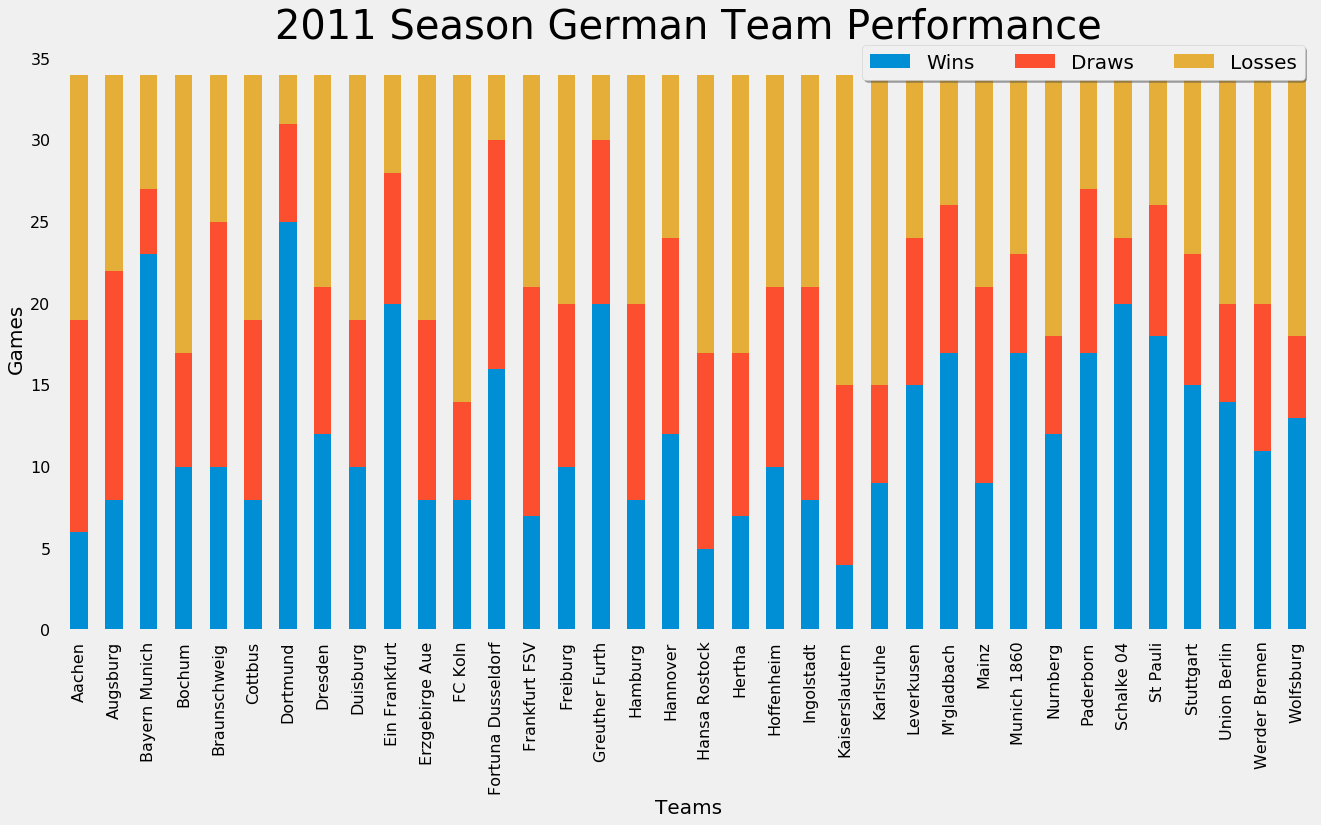

In [267]:
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('fivethirtyeight')
from matplotlib import pyplot as plt

win_lose_count_df = result.drop(['Rainy Wins', 'Goals', 'Games Played in Rain', 'Win Rate in Rain'], axis=1)
win_lose_count_df

ax = win_lose_count_df.plot.bar(stacked = 'True', figsize = (20,10))
ax.set_xlabel('Teams', fontsize = 20)
ax.set_ylabel('Games', fontsize = 20)
ax.grid(False)
ax.set_title('2011 Season German Team Performance', fontsize = 40)
ax.legend(loc='upper right', ncol=3, fancybox=True, bbox_to_anchor=(1, 1.02), shadow=True, fontsize = 20);
